In [ ]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

!cp -r "/gdrive/MyDrive/SSTA NZ" "/content/"

Mounted at /gdrive


In [ ]:
import glob
import os

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import time

import matplotlib.pyplot as plt

import pandas as pd

dir_path = '/content/SSTA NZ'

arrays = {}

for npy_file in glob.glob(os.path.join(dir_path, '*.npy')):
    array = np.load(npy_file)
    filename = os.path.splitext(os.path.basename(npy_file))[0][2:]
    arrays[filename] = array

Location: mg
Epoch [20/400], Avg Loss: 0.3411,  Val MSE: 0.2749
Epoch [40/400], Avg Loss: 0.3093,  Val MSE: 0.2574
Epoch [60/400], Avg Loss: 0.2959,  Val MSE: 0.2509
Epoch [80/400], Avg Loss: 0.2880,  Val MSE: 0.2473
Epoch [100/400], Avg Loss: 0.2823,  Val MSE: 0.2449
Epoch [120/400], Avg Loss: 0.2777,  Val MSE: 0.2433
Epoch [140/400], Avg Loss: 0.2738,  Val MSE: 0.2421
Epoch [160/400], Avg Loss: 0.2702,  Val MSE: 0.2412
Epoch [180/400], Avg Loss: 0.2671,  Val MSE: 0.2404
Epoch [200/400], Avg Loss: 0.2643,  Val MSE: 0.2399
Epoch [220/400], Avg Loss: 0.2618,  Val MSE: 0.2395
Epoch [240/400], Avg Loss: 0.2598,  Val MSE: 0.2391
Epoch [260/400], Avg Loss: 0.2581,  Val MSE: 0.2388
Epoch [280/400], Avg Loss: 0.2565,  Val MSE: 0.2385
Epoch [300/400], Avg Loss: 0.2551,  Val MSE: 0.2383
Epoch [320/400], Avg Loss: 0.2538,  Val MSE: 0.2381
Epoch [340/400], Avg Loss: 0.2526,  Val MSE: 0.2379
Epoch [360/400], Avg Loss: 0.2515,  Val MSE: 0.2378
Epoch [380/400], Avg Loss: 0.2505,  Val MSE: 0.2377
Epo

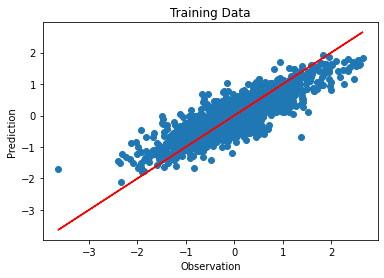

Persistence MSE: 0.2668
Test MSE: 0.2376
Test CSI: 0.8810


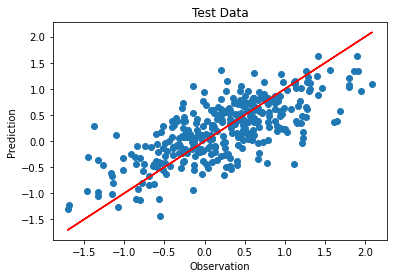

Location: si
Epoch [20/400], Avg Loss: 0.2903,  Val MSE: 0.2629
Epoch [40/400], Avg Loss: 0.2543,  Val MSE: 0.2408
Epoch [60/400], Avg Loss: 0.2397,  Val MSE: 0.2310
Epoch [80/400], Avg Loss: 0.2314,  Val MSE: 0.2270
Epoch [100/400], Avg Loss: 0.2256,  Val MSE: 0.2255
Epoch [120/400], Avg Loss: 0.2212,  Val MSE: 0.2250
Epoch [140/400], Avg Loss: 0.2176,  Val MSE: 0.2248
Epoch [160/400], Avg Loss: 0.2146,  Val MSE: 0.2248
Epoch [180/400], Avg Loss: 0.2119,  Val MSE: 0.2249
Epoch [200/400], Avg Loss: 0.2096,  Val MSE: 0.2251
Epoch [220/400], Avg Loss: 0.2075,  Val MSE: 0.2253
Epoch [240/400], Avg Loss: 0.2060,  Val MSE: 0.2255
Epoch [260/400], Avg Loss: 0.2046,  Val MSE: 0.2257
Epoch [280/400], Avg Loss: 0.2033,  Val MSE: 0.2259
Epoch [300/400], Avg Loss: 0.2021,  Val MSE: 0.2261
Epoch [320/400], Avg Loss: 0.2010,  Val MSE: 0.2264
Epoch [340/400], Avg Loss: 0.2001,  Val MSE: 0.2266
Epoch [360/400], Avg Loss: 0.1992,  Val MSE: 0.2268
Epoch [380/400], Avg Loss: 0.1983,  Val MSE: 0.2270
Epo

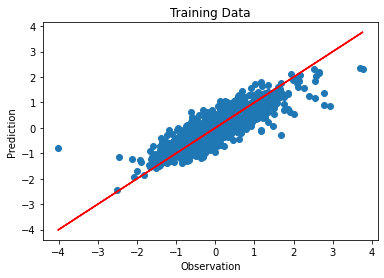

Persistence MSE: 0.2440
Test MSE: 0.2272
Test CSI: 0.6221


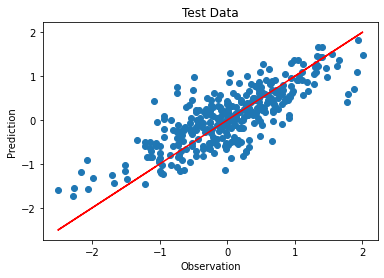

Location: f
Epoch [20/400], Avg Loss: 0.3747,  Val MSE: 0.3425
Epoch [40/400], Avg Loss: 0.3252,  Val MSE: 0.3136
Epoch [60/400], Avg Loss: 0.3075,  Val MSE: 0.3055
Epoch [80/400], Avg Loss: 0.2978,  Val MSE: 0.3032
Epoch [100/400], Avg Loss: 0.2914,  Val MSE: 0.3029
Epoch [120/400], Avg Loss: 0.2864,  Val MSE: 0.3028
Epoch [140/400], Avg Loss: 0.2821,  Val MSE: 0.3030
Epoch [160/400], Avg Loss: 0.2784,  Val MSE: 0.3033
Epoch [180/400], Avg Loss: 0.2751,  Val MSE: 0.3039
Epoch [200/400], Avg Loss: 0.2722,  Val MSE: 0.3043
Epoch [220/400], Avg Loss: 0.2695,  Val MSE: 0.3049
Epoch [240/400], Avg Loss: 0.2670,  Val MSE: 0.3055
Epoch [260/400], Avg Loss: 0.2649,  Val MSE: 0.3061
Epoch [280/400], Avg Loss: 0.2631,  Val MSE: 0.3067
Epoch [300/400], Avg Loss: 0.2613,  Val MSE: 0.3072
Epoch [320/400], Avg Loss: 0.2596,  Val MSE: 0.3078
Epoch [340/400], Avg Loss: 0.2579,  Val MSE: 0.3084
Epoch [360/400], Avg Loss: 0.2563,  Val MSE: 0.3090
Epoch [380/400], Avg Loss: 0.2547,  Val MSE: 0.3097
Epoc

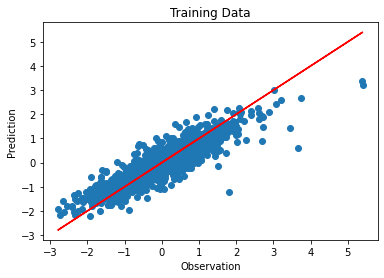

Persistence MSE: 0.3402
Test MSE: 0.3103
Test CSI: 0.6957


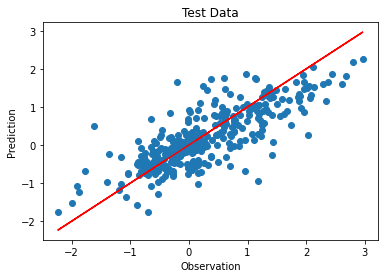

Location: cr
Epoch [20/400], Avg Loss: 0.3751,  Val MSE: 0.2614
Epoch [40/400], Avg Loss: 0.3248,  Val MSE: 0.2391
Epoch [60/400], Avg Loss: 0.3117,  Val MSE: 0.2359
Epoch [80/400], Avg Loss: 0.3046,  Val MSE: 0.2358
Epoch [100/400], Avg Loss: 0.2992,  Val MSE: 0.2357
Epoch [120/400], Avg Loss: 0.2948,  Val MSE: 0.2356
Epoch [140/400], Avg Loss: 0.2911,  Val MSE: 0.2355
Epoch [160/400], Avg Loss: 0.2879,  Val MSE: 0.2353
Epoch [180/400], Avg Loss: 0.2851,  Val MSE: 0.2353
Epoch [200/400], Avg Loss: 0.2825,  Val MSE: 0.2353
Epoch [220/400], Avg Loss: 0.2802,  Val MSE: 0.2352
Epoch [240/400], Avg Loss: 0.2781,  Val MSE: 0.2352
Epoch [260/400], Avg Loss: 0.2765,  Val MSE: 0.2352
Epoch [280/400], Avg Loss: 0.2750,  Val MSE: 0.2351
Epoch [300/400], Avg Loss: 0.2735,  Val MSE: 0.2351
Epoch [320/400], Avg Loss: 0.2722,  Val MSE: 0.2351
Epoch [340/400], Avg Loss: 0.2710,  Val MSE: 0.2350
Epoch [360/400], Avg Loss: 0.2697,  Val MSE: 0.2350
Epoch [380/400], Avg Loss: 0.2686,  Val MSE: 0.2350
Epo

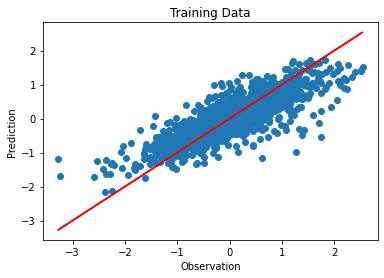

Persistence MSE: 0.2468
Test MSE: 0.2350
Test CSI: 0.4545


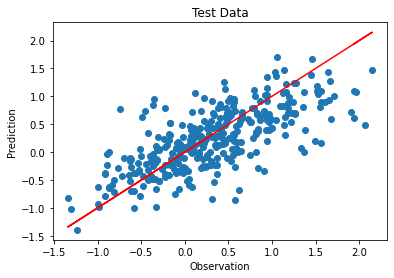

Location: w
Epoch [20/400], Avg Loss: 0.4176,  Val MSE: 0.4974
Epoch [40/400], Avg Loss: 0.3765,  Val MSE: 0.4499
Epoch [60/400], Avg Loss: 0.3638,  Val MSE: 0.4408
Epoch [80/400], Avg Loss: 0.3562,  Val MSE: 0.4384
Epoch [100/400], Avg Loss: 0.3502,  Val MSE: 0.4380
Epoch [120/400], Avg Loss: 0.3449,  Val MSE: 0.4380
Epoch [140/400], Avg Loss: 0.3400,  Val MSE: 0.4388
Epoch [160/400], Avg Loss: 0.3351,  Val MSE: 0.4404
Epoch [180/400], Avg Loss: 0.3305,  Val MSE: 0.4429
Epoch [200/400], Avg Loss: 0.3264,  Val MSE: 0.4462
Epoch [220/400], Avg Loss: 0.3225,  Val MSE: 0.4500
Epoch [240/400], Avg Loss: 0.3187,  Val MSE: 0.4544
Epoch [260/400], Avg Loss: 0.3150,  Val MSE: 0.4591
Epoch [280/400], Avg Loss: 0.3113,  Val MSE: 0.4640
Epoch [300/400], Avg Loss: 0.3077,  Val MSE: 0.4691
Epoch [320/400], Avg Loss: 0.3041,  Val MSE: 0.4741
Epoch [340/400], Avg Loss: 0.3006,  Val MSE: 0.4790
Epoch [360/400], Avg Loss: 0.2971,  Val MSE: 0.4837
Epoch [380/400], Avg Loss: 0.2937,  Val MSE: 0.4882
Epoc

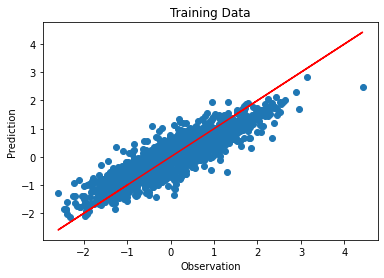

Persistence MSE: 0.4578
Test MSE: 0.4925
Test CSI: 0.5652


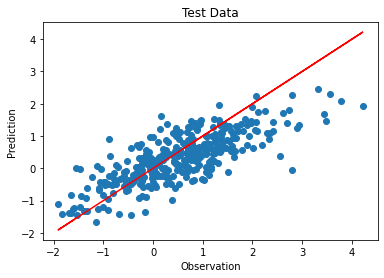

Location: r
Epoch [20/400], Avg Loss: 0.3028,  Val MSE: 0.2505
Epoch [40/400], Avg Loss: 0.2711,  Val MSE: 0.2305
Epoch [60/400], Avg Loss: 0.2576,  Val MSE: 0.2248
Epoch [80/400], Avg Loss: 0.2494,  Val MSE: 0.2219
Epoch [100/400], Avg Loss: 0.2435,  Val MSE: 0.2198
Epoch [120/400], Avg Loss: 0.2390,  Val MSE: 0.2182
Epoch [140/400], Avg Loss: 0.2352,  Val MSE: 0.2169
Epoch [160/400], Avg Loss: 0.2321,  Val MSE: 0.2160
Epoch [180/400], Avg Loss: 0.2293,  Val MSE: 0.2155
Epoch [200/400], Avg Loss: 0.2268,  Val MSE: 0.2151
Epoch [220/400], Avg Loss: 0.2247,  Val MSE: 0.2151
Epoch [240/400], Avg Loss: 0.2230,  Val MSE: 0.2149
Epoch [260/400], Avg Loss: 0.2216,  Val MSE: 0.2148
Epoch [280/400], Avg Loss: 0.2203,  Val MSE: 0.2148
Epoch [300/400], Avg Loss: 0.2191,  Val MSE: 0.2148
Epoch [320/400], Avg Loss: 0.2180,  Val MSE: 0.2149
Epoch [340/400], Avg Loss: 0.2171,  Val MSE: 0.2150
Epoch [360/400], Avg Loss: 0.2162,  Val MSE: 0.2151
Epoch [380/400], Avg Loss: 0.2154,  Val MSE: 0.2152
Epoc

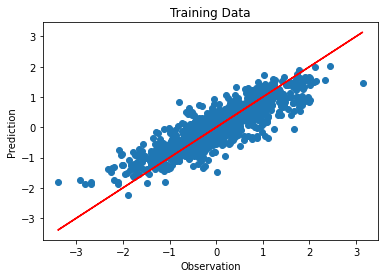

Persistence MSE: 0.2377
Test MSE: 0.2154
Test CSI: 0.9317


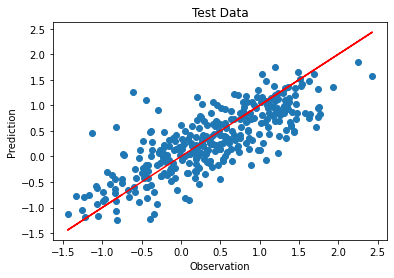

Location: ci
Epoch [20/400], Avg Loss: 0.3335,  Val MSE: 0.2937
Epoch [40/400], Avg Loss: 0.2973,  Val MSE: 0.2688
Epoch [60/400], Avg Loss: 0.2861,  Val MSE: 0.2636
Epoch [80/400], Avg Loss: 0.2799,  Val MSE: 0.2623
Epoch [100/400], Avg Loss: 0.2754,  Val MSE: 0.2617
Epoch [120/400], Avg Loss: 0.2717,  Val MSE: 0.2613
Epoch [140/400], Avg Loss: 0.2685,  Val MSE: 0.2609
Epoch [160/400], Avg Loss: 0.2657,  Val MSE: 0.2605
Epoch [180/400], Avg Loss: 0.2631,  Val MSE: 0.2601
Epoch [200/400], Avg Loss: 0.2607,  Val MSE: 0.2598
Epoch [220/400], Avg Loss: 0.2585,  Val MSE: 0.2595
Epoch [240/400], Avg Loss: 0.2566,  Val MSE: 0.2593
Epoch [260/400], Avg Loss: 0.2551,  Val MSE: 0.2592
Epoch [280/400], Avg Loss: 0.2537,  Val MSE: 0.2592
Epoch [300/400], Avg Loss: 0.2524,  Val MSE: 0.2591
Epoch [320/400], Avg Loss: 0.2511,  Val MSE: 0.2591
Epoch [340/400], Avg Loss: 0.2499,  Val MSE: 0.2591
Epoch [360/400], Avg Loss: 0.2487,  Val MSE: 0.2591
Epoch [380/400], Avg Loss: 0.2477,  Val MSE: 0.2592
Epo

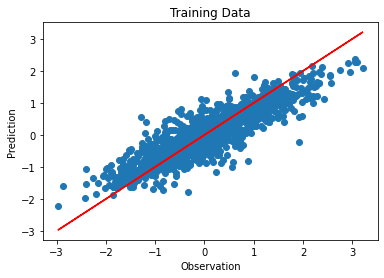

Persistence MSE: 0.3095
Test MSE: 0.2592
Test CSI: 0.5532


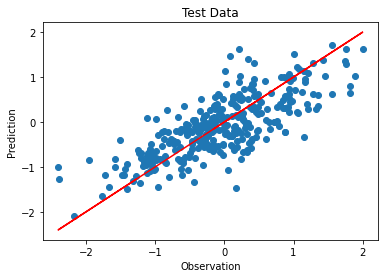

Location: cs
Epoch [20/400], Avg Loss: 0.2058,  Val MSE: 0.1703
Epoch [40/400], Avg Loss: 0.1796,  Val MSE: 0.1452
Epoch [60/400], Avg Loss: 0.1659,  Val MSE: 0.1336
Epoch [80/400], Avg Loss: 0.1572,  Val MSE: 0.1284
Epoch [100/400], Avg Loss: 0.1508,  Val MSE: 0.1257
Epoch [120/400], Avg Loss: 0.1458,  Val MSE: 0.1242
Epoch [140/400], Avg Loss: 0.1417,  Val MSE: 0.1233
Epoch [160/400], Avg Loss: 0.1383,  Val MSE: 0.1227
Epoch [180/400], Avg Loss: 0.1355,  Val MSE: 0.1222
Epoch [200/400], Avg Loss: 0.1331,  Val MSE: 0.1218
Epoch [220/400], Avg Loss: 0.1310,  Val MSE: 0.1215
Epoch [240/400], Avg Loss: 0.1296,  Val MSE: 0.1213
Epoch [260/400], Avg Loss: 0.1283,  Val MSE: 0.1211
Epoch [280/400], Avg Loss: 0.1271,  Val MSE: 0.1210
Epoch [300/400], Avg Loss: 0.1261,  Val MSE: 0.1208
Epoch [320/400], Avg Loss: 0.1251,  Val MSE: 0.1207
Epoch [340/400], Avg Loss: 0.1243,  Val MSE: 0.1206
Epoch [360/400], Avg Loss: 0.1236,  Val MSE: 0.1205
Epoch [380/400], Avg Loss: 0.1229,  Val MSE: 0.1205
Epo

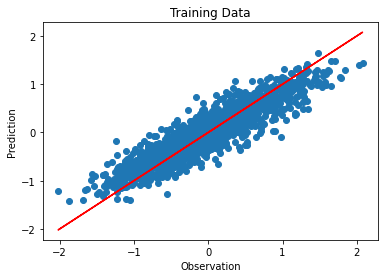

Persistence MSE: 0.1247
Test MSE: 0.1204
Test CSI: 0.6013


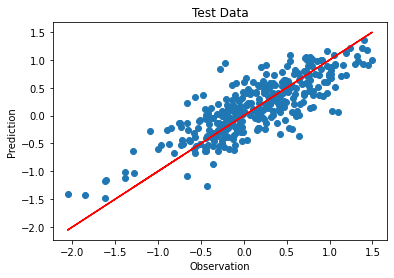

Location: bop
Epoch [20/400], Avg Loss: 0.3446,  Val MSE: 0.1860
Epoch [40/400], Avg Loss: 0.3074,  Val MSE: 0.1695
Epoch [60/400], Avg Loss: 0.2918,  Val MSE: 0.1638
Epoch [80/400], Avg Loss: 0.2828,  Val MSE: 0.1619
Epoch [100/400], Avg Loss: 0.2765,  Val MSE: 0.1613
Epoch [120/400], Avg Loss: 0.2716,  Val MSE: 0.1613
Epoch [140/400], Avg Loss: 0.2676,  Val MSE: 0.1614
Epoch [160/400], Avg Loss: 0.2643,  Val MSE: 0.1617
Epoch [180/400], Avg Loss: 0.2615,  Val MSE: 0.1619
Epoch [200/400], Avg Loss: 0.2592,  Val MSE: 0.1621
Epoch [220/400], Avg Loss: 0.2573,  Val MSE: 0.1624
Epoch [240/400], Avg Loss: 0.2555,  Val MSE: 0.1626
Epoch [260/400], Avg Loss: 0.2539,  Val MSE: 0.1627
Epoch [280/400], Avg Loss: 0.2525,  Val MSE: 0.1629
Epoch [300/400], Avg Loss: 0.2512,  Val MSE: 0.1631
Epoch [320/400], Avg Loss: 0.2500,  Val MSE: 0.1632
Epoch [340/400], Avg Loss: 0.2489,  Val MSE: 0.1633
Epoch [360/400], Avg Loss: 0.2479,  Val MSE: 0.1634
Epoch [380/400], Avg Loss: 0.2470,  Val MSE: 0.1635
Ep

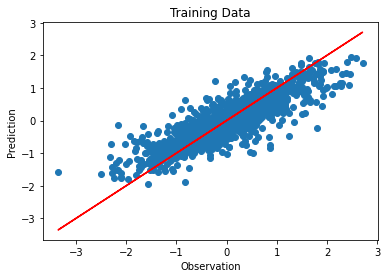

Persistence MSE: 0.1690
Test MSE: 0.1636
Test CSI: 0.8327


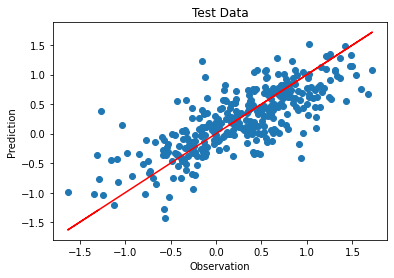

Location: op
Epoch [20/400], Avg Loss: 0.3142,  Val MSE: 0.3396
Epoch [40/400], Avg Loss: 0.2694,  Val MSE: 0.3112
Epoch [60/400], Avg Loss: 0.2535,  Val MSE: 0.2979
Epoch [80/400], Avg Loss: 0.2448,  Val MSE: 0.2903
Epoch [100/400], Avg Loss: 0.2387,  Val MSE: 0.2855
Epoch [120/400], Avg Loss: 0.2340,  Val MSE: 0.2823
Epoch [140/400], Avg Loss: 0.2303,  Val MSE: 0.2802
Epoch [160/400], Avg Loss: 0.2272,  Val MSE: 0.2787
Epoch [180/400], Avg Loss: 0.2244,  Val MSE: 0.2777
Epoch [200/400], Avg Loss: 0.2222,  Val MSE: 0.2770
Epoch [220/400], Avg Loss: 0.2202,  Val MSE: 0.2766
Epoch [240/400], Avg Loss: 0.2185,  Val MSE: 0.2765
Epoch [260/400], Avg Loss: 0.2169,  Val MSE: 0.2765
Epoch [280/400], Avg Loss: 0.2154,  Val MSE: 0.2766
Epoch [300/400], Avg Loss: 0.2141,  Val MSE: 0.2767
Epoch [320/400], Avg Loss: 0.2129,  Val MSE: 0.2768
Epoch [340/400], Avg Loss: 0.2118,  Val MSE: 0.2770
Epoch [360/400], Avg Loss: 0.2108,  Val MSE: 0.2772
Epoch [380/400], Avg Loss: 0.2100,  Val MSE: 0.2774
Epo

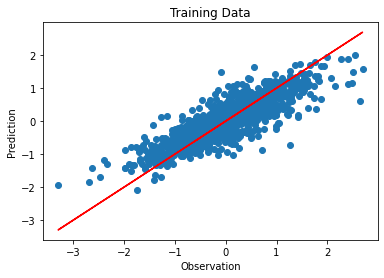

Persistence MSE: 0.3155
Test MSE: 0.2776
Test CSI: 0.5829


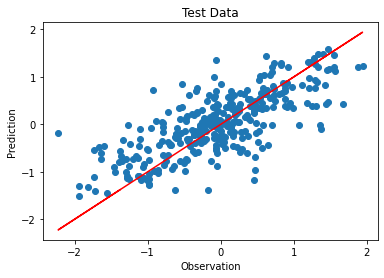

Location: t
Epoch [20/400], Avg Loss: 0.3366,  Val MSE: 0.4160
Epoch [40/400], Avg Loss: 0.2980,  Val MSE: 0.3901
Epoch [60/400], Avg Loss: 0.2833,  Val MSE: 0.3805
Epoch [80/400], Avg Loss: 0.2752,  Val MSE: 0.3742
Epoch [100/400], Avg Loss: 0.2695,  Val MSE: 0.3696
Epoch [120/400], Avg Loss: 0.2652,  Val MSE: 0.3663
Epoch [140/400], Avg Loss: 0.2615,  Val MSE: 0.3639
Epoch [160/400], Avg Loss: 0.2583,  Val MSE: 0.3621
Epoch [180/400], Avg Loss: 0.2555,  Val MSE: 0.3608
Epoch [200/400], Avg Loss: 0.2531,  Val MSE: 0.3598
Epoch [220/400], Avg Loss: 0.2512,  Val MSE: 0.3590
Epoch [240/400], Avg Loss: 0.2495,  Val MSE: 0.3585
Epoch [260/400], Avg Loss: 0.2479,  Val MSE: 0.3581
Epoch [280/400], Avg Loss: 0.2464,  Val MSE: 0.3579
Epoch [300/400], Avg Loss: 0.2451,  Val MSE: 0.3577
Epoch [320/400], Avg Loss: 0.2438,  Val MSE: 0.3576
Epoch [340/400], Avg Loss: 0.2426,  Val MSE: 0.3575
Epoch [360/400], Avg Loss: 0.2415,  Val MSE: 0.3575
Epoch [380/400], Avg Loss: 0.2405,  Val MSE: 0.3575
Epoc

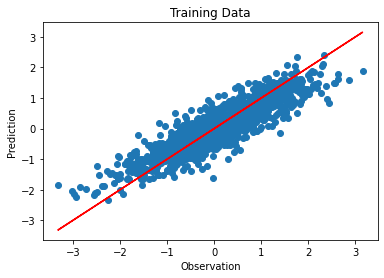

Persistence MSE: 0.3926
Test MSE: 0.3574
Test CSI: 0.9404


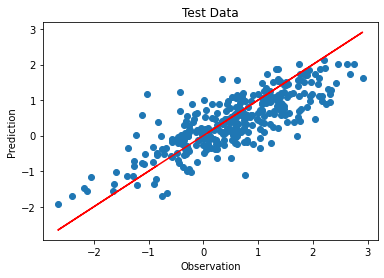

Location: bp
Epoch [20/400], Avg Loss: 0.3863,  Val MSE: 0.4115
Epoch [40/400], Avg Loss: 0.3523,  Val MSE: 0.4010
Epoch [60/400], Avg Loss: 0.3399,  Val MSE: 0.4016
Epoch [80/400], Avg Loss: 0.3328,  Val MSE: 0.4022
Epoch [100/400], Avg Loss: 0.3276,  Val MSE: 0.4023
Epoch [120/400], Avg Loss: 0.3233,  Val MSE: 0.4022
Epoch [140/400], Avg Loss: 0.3196,  Val MSE: 0.4020
Epoch [160/400], Avg Loss: 0.3163,  Val MSE: 0.4017
Epoch [180/400], Avg Loss: 0.3132,  Val MSE: 0.4014
Epoch [200/400], Avg Loss: 0.3104,  Val MSE: 0.4011
Epoch [220/400], Avg Loss: 0.3077,  Val MSE: 0.4008
Epoch [240/400], Avg Loss: 0.3054,  Val MSE: 0.4006
Epoch [260/400], Avg Loss: 0.3033,  Val MSE: 0.4006
Epoch [280/400], Avg Loss: 0.3012,  Val MSE: 0.4007
Epoch [300/400], Avg Loss: 0.2993,  Val MSE: 0.4010
Epoch [320/400], Avg Loss: 0.2974,  Val MSE: 0.4013
Epoch [340/400], Avg Loss: 0.2957,  Val MSE: 0.4016
Epoch [360/400], Avg Loss: 0.2941,  Val MSE: 0.4020
Epoch [380/400], Avg Loss: 0.2925,  Val MSE: 0.4023
Epo

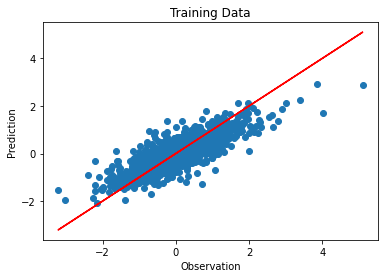

Persistence MSE: 0.4665
Test MSE: 0.4027
Test CSI: 0.5714


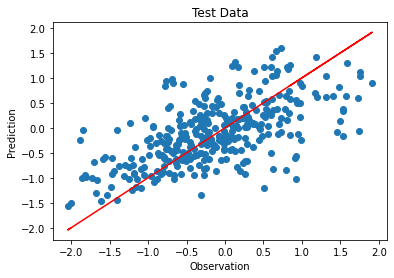

In [29]:
net_class = 'FCN'
num_layer = 2
num_hid_feat = 20
num_out_feat = 1
window_size = 6
train_split = 0.8
loss_function = 'MSE'
activation = 'tanh'
optimizer = 'SGD'
learning_rate = 0.01
momentum = 0.9
weight_decay = 0.01
regularization = 'L2' + str(weight_decay)
drop_out_rate = 0
batch_size = 64
num_train_epochs = 400

data_path = 'data/'
models_path = 'out/'
out_path = 'out/'

num_var = 12

class FCN(nn.Module):
    def __init__(self, num_input_feat, num_hid_feat, num_out_feat, drop_out_rate):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_input_feat, num_hid_feat)
        self.fc2 = nn.Linear(num_hid_feat, num_hid_feat)
        self.fc3 = nn.Linear(num_hid_feat, num_out_feat)
        self.dropout = nn.Dropout(drop_out_rate)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

for lead_time in [1]:

    lead_time = lead_time
    num_sample = 1680-window_size-lead_time+1 # max: node_features.shape[1]-window_size-lead_time+1
    
    all_loc = []
    all_persist_mse = []
    all_test_mse = []
    all_test_csi = []

    for loc in list(arrays.keys()):
        
        print('Location:', loc)
        
        y = arrays[loc]
        y_all = y

        x_all = [np.column_stack([arrays[list(arrays.keys())[i]][j:j+window_size] for i in range(num_var)]) for j in range(len(y)-window_size-lead_time)]
        y_all = [y[j+window_size+lead_time-1] for j in range(len(y)-window_size-lead_time)]
        x_all = np.swapaxes(x_all, 1, 2)
        x_all_flat = np.array(x_all).reshape(-1, num_var*6)
        y_all = np.array(y_all)

        num_train = int(len(x_all) * train_split)
        x_train, y_train = torch.tensor(x_all_flat[:num_train]).to(torch.float32), torch.tensor(y_all[:num_train]).to(torch.float32)
        x_test, y_test = torch.tensor(x_all_flat[num_train:]).to(torch.float32), torch.tensor(y_all[num_train:]).to(torch.float32)

        # The threshold for defining outliers using the 90th percentile
        y_train_sorted = np.sort(y_train.numpy())
        threshold = y_train_sorted[int(len(y_train_sorted)*0.9):][0]
        threshold_low = y_train_sorted[int(len(y_train_sorted)*0.8):][0]

        model = FCN(x_all_flat.shape[1], num_hid_feat, num_out_feat, drop_out_rate)
        optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        criterion = nn.MSELoss()

        for epoch in range(num_train_epochs):
            epoch_loss = 0
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                y_pred = model(x_batch)
                loss = criterion(y_pred, y_batch)
                l2_reg = 0.0
                for param in model.parameters():
                    l2_reg += torch.norm(param)
                loss += weight_decay * l2_reg
                optim.zero_grad()
                loss.backward()
                optim.step()
                if (epoch+1) % 20 == 0:
                    #print('Batch [{}/{}], Loss: {:.4f}'.format((i//batch_size)+1, len(x_train)//batch_size, loss.item()))
                    epoch_loss += loss.item()
            with torch.no_grad():
                y_pred = model(x_test)
                val_mse = criterion(y_pred, y_test)     
            if (epoch+1) % 20 == 0:
                epoch_loss /= len(x_train) // batch_size   
                print('Epoch [{}/{}], Avg Loss: {:.4f},  Val MSE: {:.4f}'.format(epoch+1, num_train_epochs, epoch_loss, val_mse))
        
            with torch.no_grad():
                y_pred = model(x_train)

        plt.scatter(y_train, y_pred)
        x = y_train
        y = y_train
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Training Data')
        plt.show()

        with torch.no_grad():
            persist_mse = criterion(y_test[lead_time:], y_test[:-lead_time])
            y_pred = model(x_test)
            test_mse = criterion(y_pred, y_test)
            print('Persistence MSE: {:.4f}'.format(persist_mse.item()))
            print('Test MSE: {:.4f}'.format(test_mse.item()))

        pred_pos = [float(i) > threshold_low for i in y_pred]
        y_test_pos = [float(i) > threshold_low for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(y_pred))]
        test_csi = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI: {:.4f}'.format(test_csi))

        plt.scatter(y_test, y_pred)
        x = y_test
        y = y_test
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Test Data')
        plt.show()

        all_loc.append(loc)
        all_persist_mse.append(persist_mse)
        all_test_mse.append(test_mse)
        all_test_csi.append(test_csi)

In [30]:
all_persist_mse_float = [float(i) for i in all_persist_mse]
all_test_mse_float = [float(i) for i in all_test_mse]

test_results = pd.DataFrame({'Location': all_loc, 'Persistence MSE': all_persist_mse_float, 'Test MSE': all_test_mse_float, 'Test CSI': all_test_csi})
test_results

,Location,Persistence MSE,Test MSE,Test CSI
0,mg,0.266772,0.237612,0.881029
1,si,0.243967,0.227244,0.622093
2,f,0.340213,0.310298,0.695652
3,cr,0.246755,0.235022,0.454545
4,w,0.457816,0.492518,0.565217
5,r,0.237706,0.215352,0.931677
6,ci,0.309542,0.259198,0.553191
7,cs,0.124674,0.120406,0.601266
8,bop,0.168980,0.163635,0.832727
9,op,0.315453,0.277587,0.582888
